## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
"""Code Here
設定超參數
"""
#LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
#固定learning rate
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85,0.8]
NESTEROV = True

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTU = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=NESTEROV, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momemtum-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTU = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.2862 - acc: 0.1286 - val_loss: 2.2410 - val_acc: 0.1800
Epoch 2/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.2135 - acc: 0.2013 - val_loss: 2.1864 - val_acc: 0.2368
Epoch 3/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.1644 - acc: 0.2434 - val_loss: 2.1408 - val_acc: 0.2679
Epoch 4/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.1209 - acc: 0.2651 - val_loss: 2.0991 - val_acc: 0.2805
Epoch 5/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.0807 - acc: 0.2818 - val_loss: 2.0613 - val_acc: 0.2924
Epoch 6/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.0448 - acc: 0.2930 - val_loss: 2.0278 - val_acc: 0.3004
Epoch 7/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.0133 - acc: 0.3036 - val_loss: 1.9984 - val_acc

50000/50000 [==============================] - 1s 16us/step - loss: 2.2168 - acc: 0.1916 - val_loss: 2.1891 - val_acc: 0.2168
Epoch 3/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.1642 - acc: 0.2286 - val_loss: 2.1413 - val_acc: 0.2466
Epoch 4/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.1215 - acc: 0.2525 - val_loss: 2.1034 - val_acc: 0.2657
Epoch 5/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0861 - acc: 0.2697 - val_loss: 2.0705 - val_acc: 0.2782
Epoch 6/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0556 - acc: 0.2812 - val_loss: 2.0422 - val_acc: 0.2915
Epoch 7/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.0291 - acc: 0.2923 - val_loss: 2.0178 - val_acc: 0.3025
Epoch 8/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0062 - acc: 0.3007 - val_loss: 1.9963 - val_acc: 0.3080
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 1s 16us/step - loss: 2.2002 - acc: 0.2251 - val_loss: 2.1818 - val_acc: 0.2384
Epoch 4/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.1679 - acc: 0.2409 - val_loss: 2.1524 - val_acc: 0.2526
Epoch 5/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.1408 - acc: 0.2532 - val_loss: 2.1272 - val_acc: 0.2648
Epoch 6/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.1171 - acc: 0.2646 - val_loss: 2.1050 - val_acc: 0.2732
Epoch 7/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0962 - acc: 0.2705 - val_loss: 2.0857 - val_acc: 0.2809
Epoch 8/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0777 - acc: 0.2782 - val_loss: 2.0674 - val_acc: 0.2852
Epoch 9/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0604 - acc: 0.2833 - val_loss: 2.0510 - val_acc: 0.2910
Epoch 10/50
50000/50000 [===========================

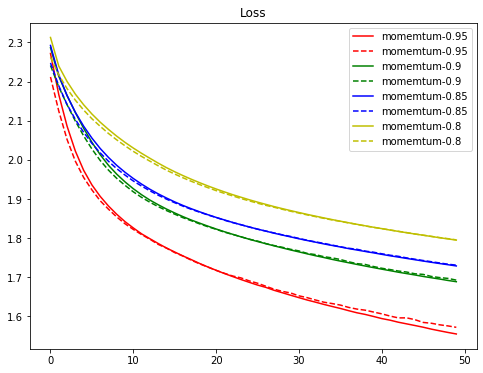

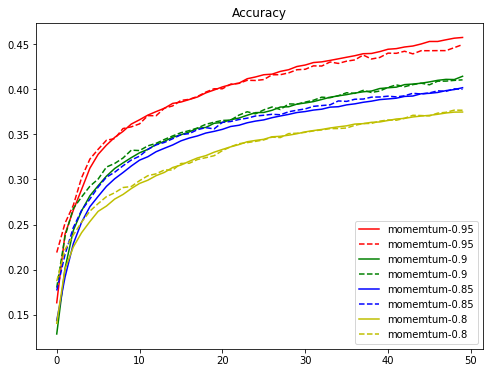

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [24]:
"""Code Here
設定超參數
"""
#固定learning rate
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
#固定momentum
MOMENTUM = 0.95
NESTEROV = [True, False]

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for ne in NESTEROV:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment nestorov with NESTEROV = ", ne)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=ne, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "nesterov-%s" % str(ne)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment nestorov with NESTEROV =  True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.2480 - acc: 0.1809 - val_loss: 2.1765 - val_acc: 0.2418
Epoch 2/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.1301 - acc: 0.2589 - val_loss: 2.0865 - val_acc: 0.2734
Epoch 3/50
50000/50000 [==============================] - 1s 16us/step - loss: 2.0530 - acc: 0.2839 - val_loss: 2.0218 - val_acc: 0.2951
Epoch 4/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.9971 - acc: 0.3040 - val_loss: 1.9728 - val_acc: 0.3169
Epoch 5/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.9560 - acc: 0.3169 - val_loss: 1.9366 - val_acc: 0.3254
Epoch 6/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.9239 - acc: 0.3300 - val_loss: 1.9092 - val_acc: 0.3351
Epoch 7/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.8976 - acc: 0.3395 - val_loss: 1.8843 - val_acc

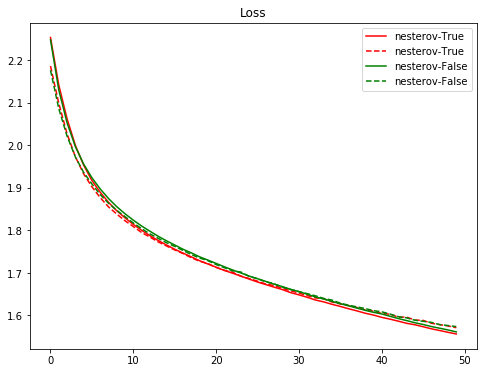

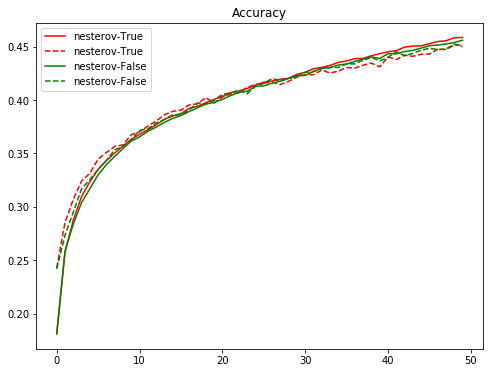

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 結論:
* 改變Nesterov對模型訓練影響不大.
* 改變momentum對模型訓練影響很大.